# FusionTrack3D: Data Visualization

This notebook demonstrates the loading and visualization of KITTI dataset, showing:
1. Camera images
2. LiDAR point clouds
3. Sensor fusion visualization

In [ ]:
import os
import sys
import numpy as np
import cv2
import open3d as o3d

# matplotlib congig for Jupyter
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# add project root to Python path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))


from src.data_utils.kitti_dataset import KITTIDataset
from src.data_utils.visualizer import DataVisualizer

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 1. Initialize Dataset

In [ ]:
dataset = KITTIDataset(
    base_path='/workspace/data/kitti/raw',
    date='2011_09_26',
    drive='0001'
)

# load frame
frame_data = dataset.get_frame_data(0) # 0= 1st frame

print("Frame data contains:")
print(f"- Image shape: {frame_data['image'].shape}")
print(f"- Number of LiDAR points: {frame_data['points'].shape[0]}")

Frame data contains:
- Image shape: (375, 1242, 3)
- Number of LiDAR points: 121015


## 2. Visualize Camera Image

Original Image:


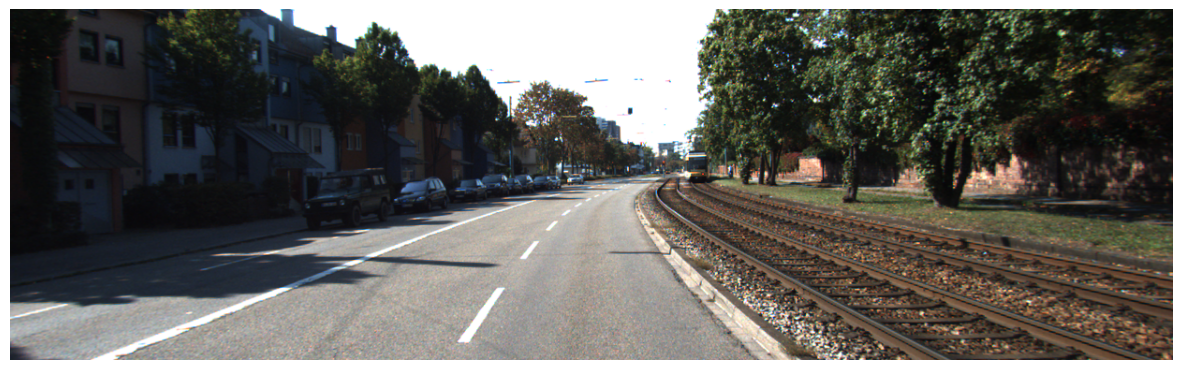

In [ ]:
print("Original Image:")
DataVisualizer.visualize_frame(frame_data, show_lidar_overlay=False)



## 3. Visualize LiDAR Projection


Image with LiDAR points projected:


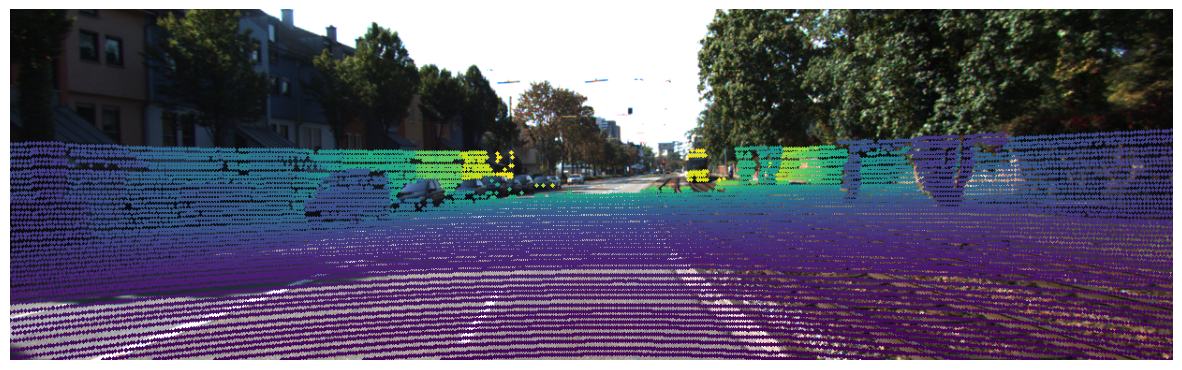

In [5]:
print("\nImage with LiDAR points projected:")
DataVisualizer.visualize_frame(frame_data, show_lidar_overlay=True)

## 4. 3D Point Cloud Visualization

In [6]:
print("3D Point Cloud Visualization:")
DataVisualizer.visualize_point_cloud(frame_data['points'], view_dims='3d')

print("\nBird's Eye View:")
DataVisualizer.visualize_point_cloud(frame_data['points'], view_dims='bev')

3D Point Cloud Visualization:


amdgpu: os_same_file_description couldn't determine if two DRM fds reference the same file description.
If they do, bad things may happen!
amdgpu: drmGetDevice2 failed.



Bird's Eye View:


amdgpu: drmGetDevice2 failed.


## 5. Interactive Frame Viewer

In [7]:
from ipywidgets import interact, IntSlider

def view_frame(frame_idx):
    try:
        frame_data = dataset.get_frame_data(frame_idx)
        DataVisualizer.visualize_frame(frame_data, show_lidar_overlay=True)
    except Exception as e:
        print(f"Error loading frame {frame_idx}: {str(e)}")

# Create interactive slider for frame selection
interact(view_frame, 
        frame_idx=IntSlider(
            min=0, 
            max=len(dataset.frame_indices)-1, 
            step=1, 
            value=0,
            description='Frame:'
        ))

interactive(children=(IntSlider(value=0, description='Frame:', max=107), Output()), _dom_classes=('widget-inte…

<function __main__.view_frame(frame_idx)>

## 5. Multiview

Multi-view Visualization:


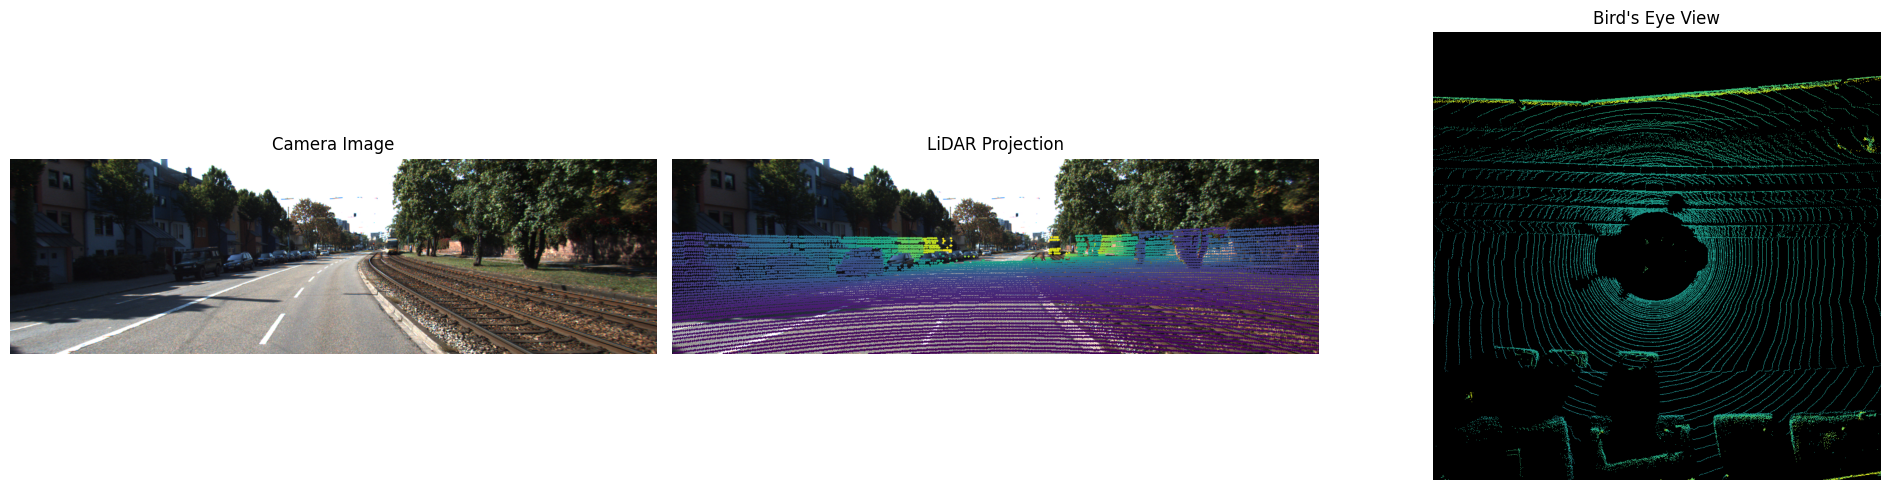

In [8]:
print("Multi-view Visualization:")
DataVisualizer.visualize_frame_multi_view(frame_data)